In [1]:
import pandas as pd
import numpy as np
pd.__version__

'2.2.2'

# Readability Test

- it indicates at what educational level a person needs to be in , in order to comprehend a particular piece of text
- determine the readability of an english passage
- scale ranging from primary school upto college graduate level

# Readability tests 

- Flesch reading ease
- Gunning fog index
- Simple Measure of Gobbledygook(SMOG)
- Dale-Chall score

## Flesch Reading Ease

Depend on two factors
- Greater the average sentence length , harder the text is to read.
- Greater the average number of syllables in a word , harder the text is to read.

Higher the score , greater the readability

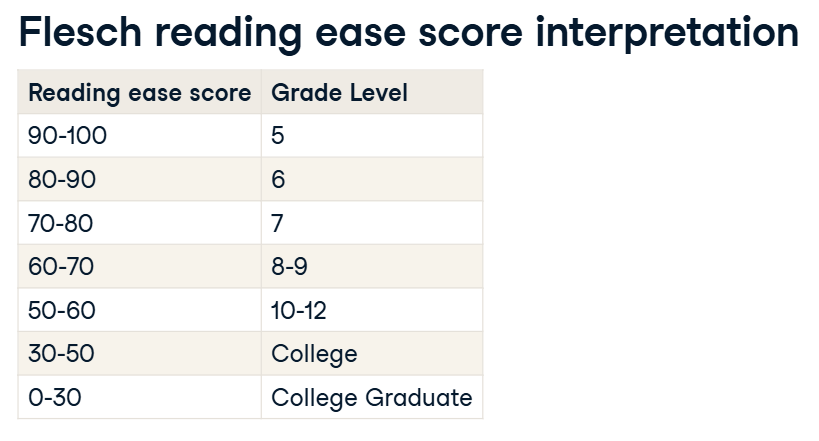

## Gunning fog Index

- Also depend on average sentence length
- Greater the percentage of complex words , harder the text is to read
- complex words ==> all words that have 3 or more syllables

Higher the score lesser the readability

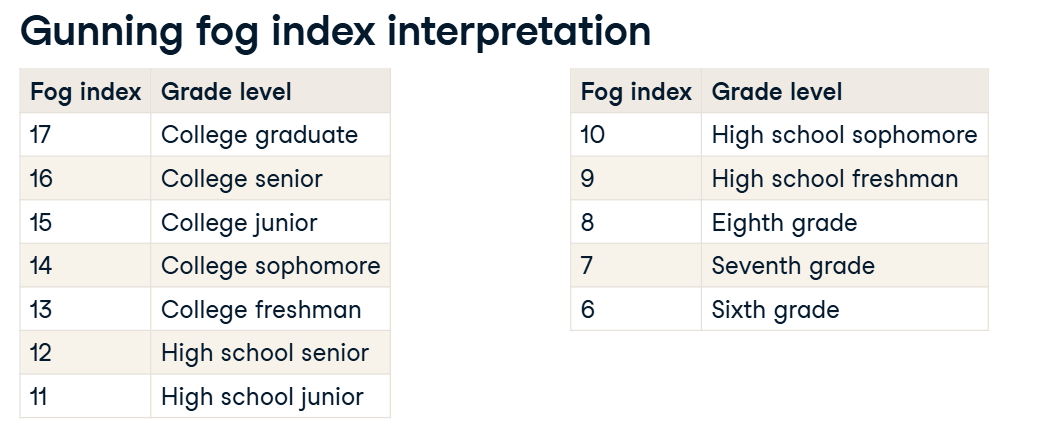

In [3]:
from textatistic import Textatistic

text = 'There was a king with a large jaw.'

# create the textstatistic object
readability_scores = Textatistic(text).scores

print(readability_scores)

{'flesch_score': 114.11500000000001, 'fleschkincaid_score': -0.6699999999999982, 'gunningfog_score': 3.2, 'smog_score': 3.1291, 'dalechall_score': 0.3968}


# Tokenization and Lemmatization

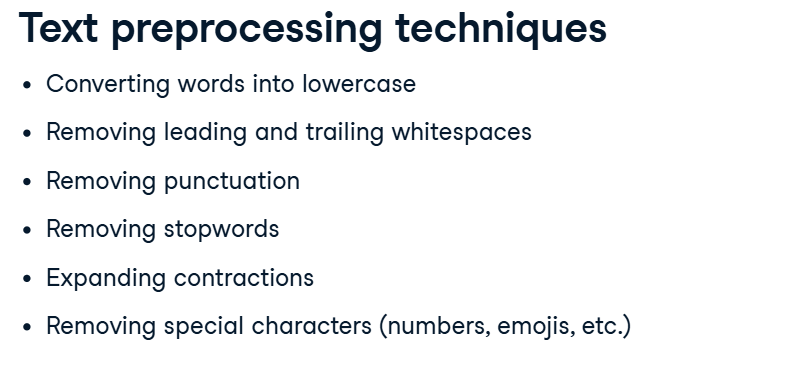

- contractions - don't ==> do not , won't ==> will not

## Tokenization

- process of splitting a string into its constituent tokens
- these tokens may be sentences , words or punctuations

In [2]:
import spacy

# load the em_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# initialize the string
string = "Hello! I don't know what I'm doing here."

# create a doc object
doc = nlp(string)

# generate the list of tokens
tokens = [token.text for token in doc]
print(tokens)

/home/ishan/miniconda3/envs/NLP/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/ishan/miniconda3/envs/NLP/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


['Hello', '!', 'I', 'do', "n't", 'know', 'what', 'I', "'m", 'doing', 'here', '.']


In [5]:
# Print tokens and their lemmas
for token in doc:
    print(f"Token: {token.text}, Lemma: {token.lemma_}, POS: {token.pos_}")

Token: Hello, Lemma: hello, POS: INTJ
Token: !, Lemma: !, POS: PUNCT
Token: I, Lemma: I, POS: PRON
Token: do, Lemma: do, POS: AUX
Token: n't, Lemma: not, POS: PART
Token: know, Lemma: know, POS: VERB
Token: what, Lemma: what, POS: PRON
Token: I, Lemma: I, POS: PRON
Token: 'm, Lemma: be, POS: AUX
Token: doing, Lemma: do, POS: VERB
Token: here, Lemma: here, POS: ADV
Token: ., Lemma: ., POS: PUNCT


## Lemmatization

- convert word into its base form or lemma
- eg: reducing , reduces , reduced , reduction ==> reduce
- eg: am , is , are ==> be
- n't ==> not , 've ==> have

In [6]:
# generate list of lemmas
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['hello', '!', 'I', 'do', 'not', 'know', 'what', 'I', 'be', 'do', 'here', '.']


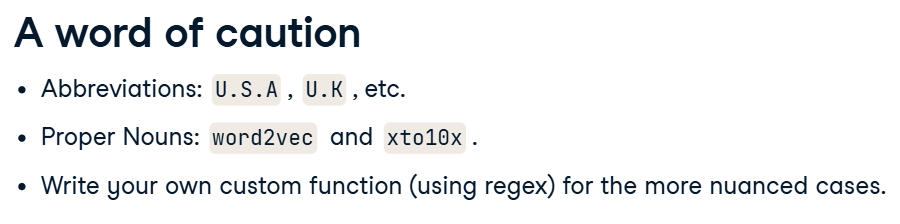

## Removing non-alphabetic characters

In [7]:
string = """
OMG!!!! This is like      the best thing ever \t\n.
Wow, Such an amazing song! I'm hooked. Top 5 definitely. ?
"""

In [8]:
doc = nlp(string)

lemmas = [token.lemma_ for token in doc]
print(lemmas)

['\n', 'OMG', '!', '!', '!', '!', 'this', 'be', 'like', '     ', 'the', 'good', 'thing', 'ever', '\t\n', '.', '\n', 'wow', ',', 'such', 'an', 'amazing', 'song', '!', 'I', 'be', 'hooked', '.', 'top', '5', 'definitely', '.', '?', '\n']


In [9]:
lemmas = [token.lemma_ for token in doc if token.pos_ != 'PRON']
print(lemmas)

['\n', 'OMG', '!', '!', '!', '!', 'be', 'like', '     ', 'the', 'good', 'thing', 'ever', '\t\n', '.', '\n', 'wow', ',', 'such', 'an', 'amazing', 'song', '!', 'be', 'hooked', '.', 'top', '5', 'definitely', '.', '?', '\n']


In [10]:
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha()]
print(a_lemmas)

['OMG', 'be', 'like', 'the', 'good', 'thing', 'ever', 'wow', 'such', 'an', 'amazing', 'song', 'be', 'hooked', 'top', 'definitely']


In [11]:
print(' '.join(a_lemmas))

OMG be like the good thing ever wow such an amazing song be hooked top definitely


## Stopwords

- words that occur extremely commonly
- eg: articles,be verbs, pronouns

In [12]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS

a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stop_words]
print(a_lemmas)

['omg', 'like', 'good', 'thing', 'wow', 'amazing', 'song', 'hooked', 'definitely']


## Part of Speech(POS) tagging

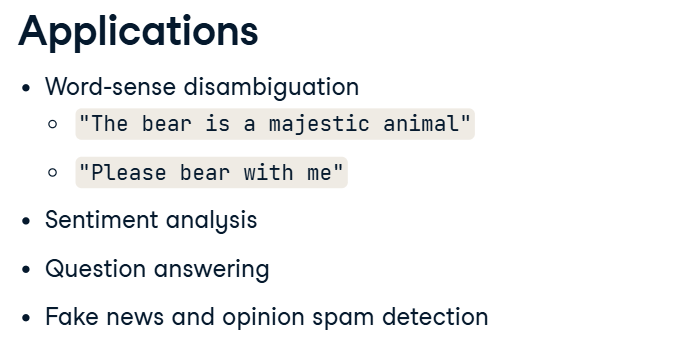

- the 'bear' has 2 different meanings in different instances , this helps to identify one as a noun and other as a verb

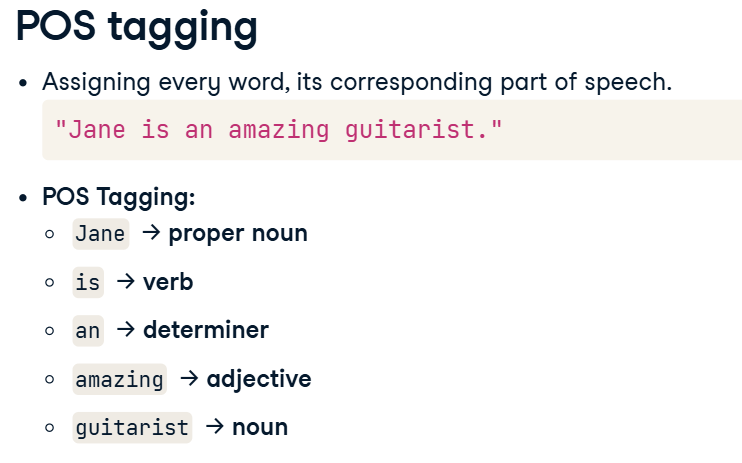

In [13]:
string = "Jane is an amazing guitarist"

doc = nlp(string)

pos = [(token.text , token.pos_) for token in doc]
print(pos)

[('Jane', 'PROPN'), ('is', 'AUX'), ('an', 'DET'), ('amazing', 'ADJ'), ('guitarist', 'NOUN')]


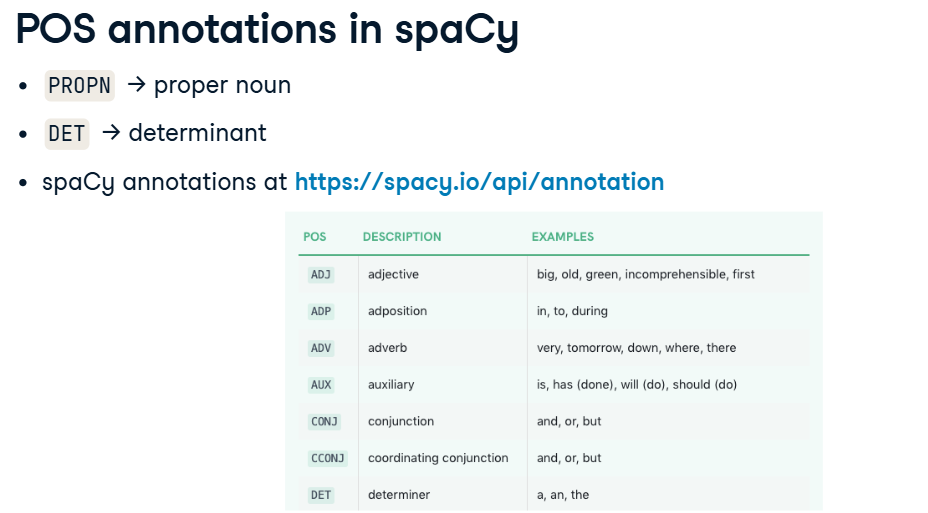

In [14]:
tokens = [token.lemma_ for token in doc]
lemmas = [lemma for lemma in tokens if lemma not in stop_words]
print(lemmas)

['Jane', 'amazing', 'guitarist']


## Named Entity Recognition (NER)

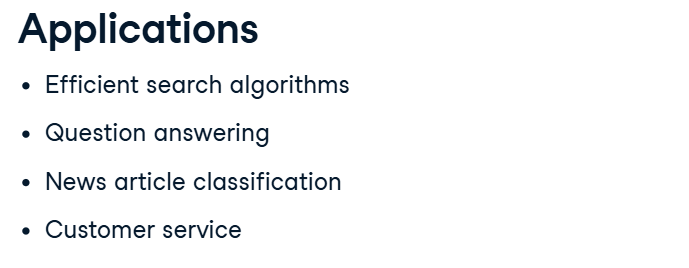


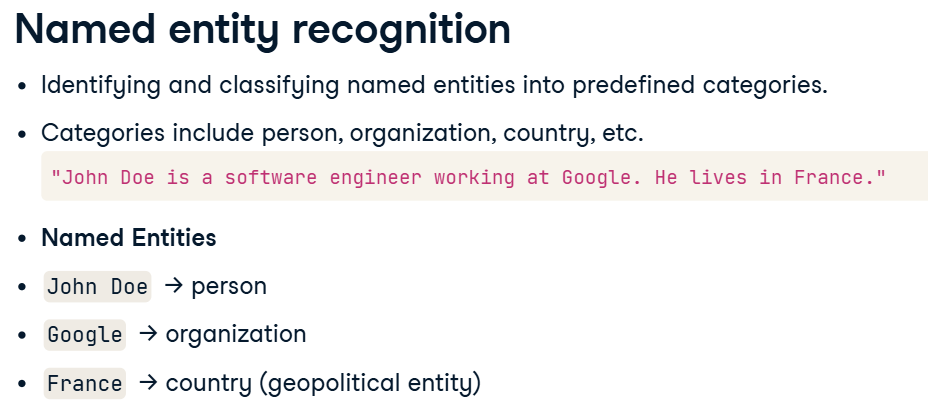

In [17]:
string = "John Doe is a software engineer working at Google. He lives in France."

doc = nlp(string)

# generate named entities
ne = [(ent.text, ent.label_) for ent in doc.ents]
print(ne)

[('John Doe', 'PERSON'), ('Google', 'ORG'), ('France', 'GPE')]


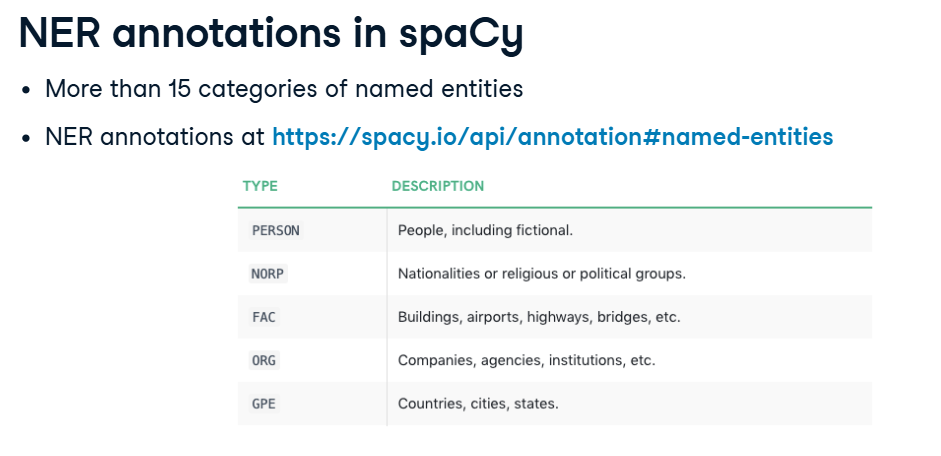

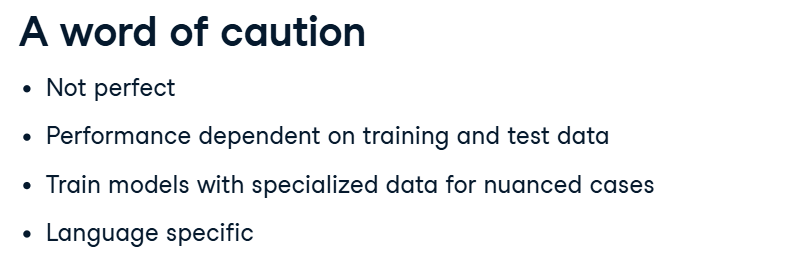

## Building Bag of Words model

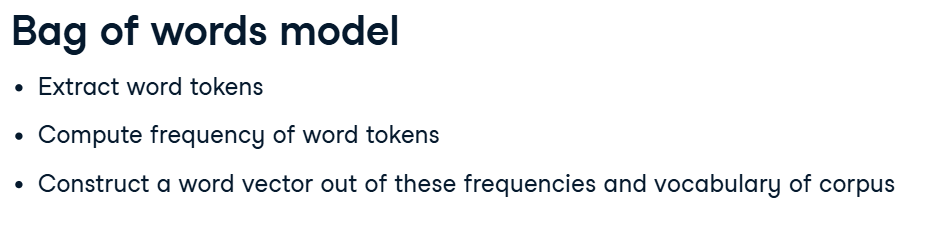

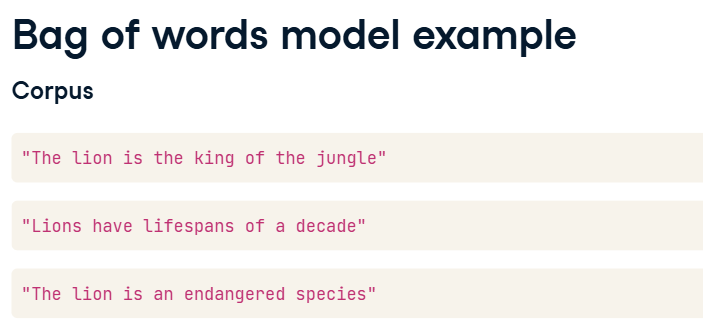

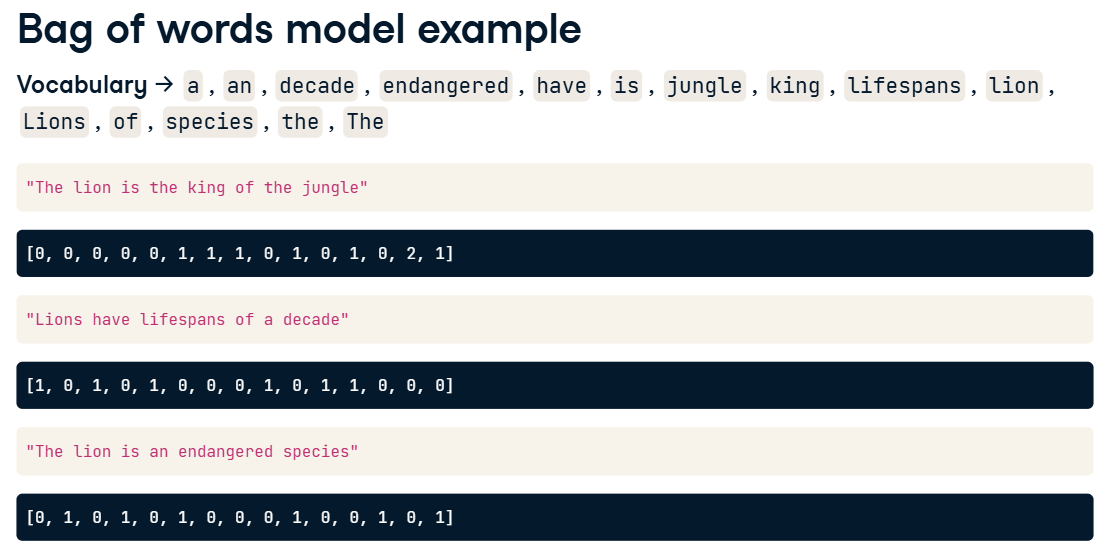

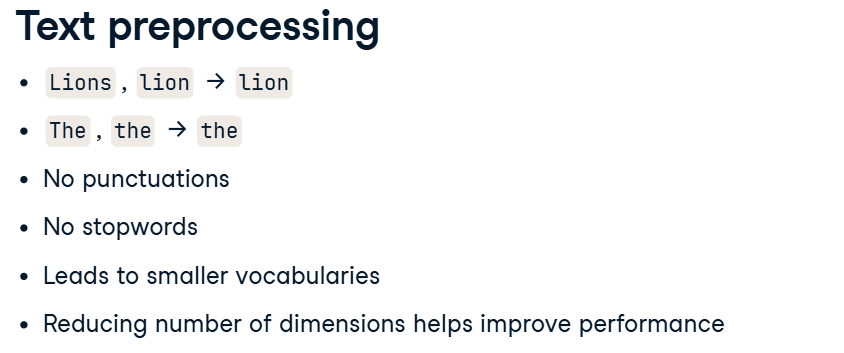

In [21]:
corpus = pd.Series([
'The lion is the king of the jungle' ,
'Lions have lifespans of a decade' ,
'The lion is an endangered species'
])

# import the countvectorizer class
from sklearn.feature_extraction.text import CountVectorizer

# create the countvectorize object
vectorizer = CountVectorizer()

# generate the matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)
print(bow_matrix.A)

[[0 0 0 0 1 1 1 0 1 0 1 0 3]
 [0 1 0 1 0 0 0 1 0 1 1 0 0]
 [1 0 1 0 1 0 0 0 1 0 0 1 1]]


In [22]:
vectorizer.get_feature_names_out()

array(['an', 'decade', 'endangered', 'have', 'is', 'jungle', 'king',
       'lifespans', 'lion', 'lions', 'of', 'species', 'the'], dtype=object)

In [31]:
vectorizer.vocabulary_

{'the': 12,
 'lion': 8,
 'is': 4,
 'king': 6,
 'of': 10,
 'jungle': 5,
 'lions': 9,
 'have': 3,
 'lifespans': 7,
 'decade': 1,
 'an': 0,
 'endangered': 2,
 'species': 11}

In [40]:
sorted(vectorizer.vocabulary_.items() , key=lambda x : x[1])

[('an', 0),
 ('decade', 1),
 ('endangered', 2),
 ('have', 3),
 ('is', 4),
 ('jungle', 5),
 ('king', 6),
 ('lifespans', 7),
 ('lion', 8),
 ('lions', 9),
 ('of', 10),
 ('species', 11),
 ('the', 12)]

In [44]:
pd.DataFrame(bow_matrix.toarray() , columns=vectorizer.get_feature_names_out())

,an,decade,endangered,have,is,jungle,king,lifespans,lion,lions,of,species,the
0,0,0,0,0,1,1,1,0,1,0,1,0,3
1,0,1,0,1,0,0,0,1,0,1,1,0,0
2,1,0,1,0,1,0,0,0,1,0,0,1,1


## Buidling a BoW Naive Bayes Classifier

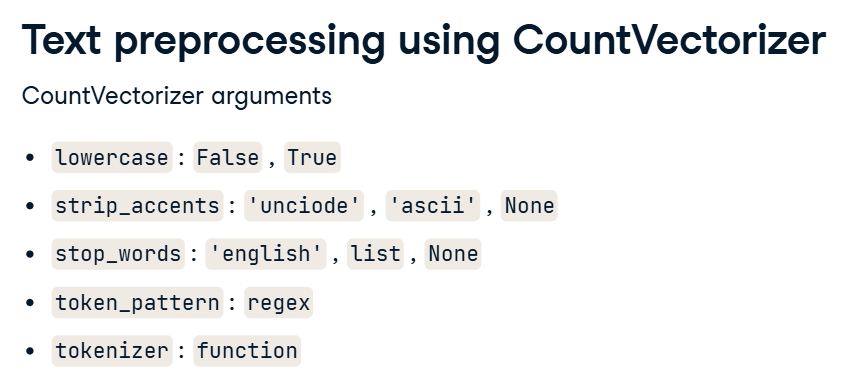

In [ ]:
# import the countvectorizer class
from sklearn.feature_extraction.text import CountVectorizer

# create the countvectorize object
vectorizer = CountVectorizer(strip_accents='ascii' , stop_words='english' , lowercase=False)



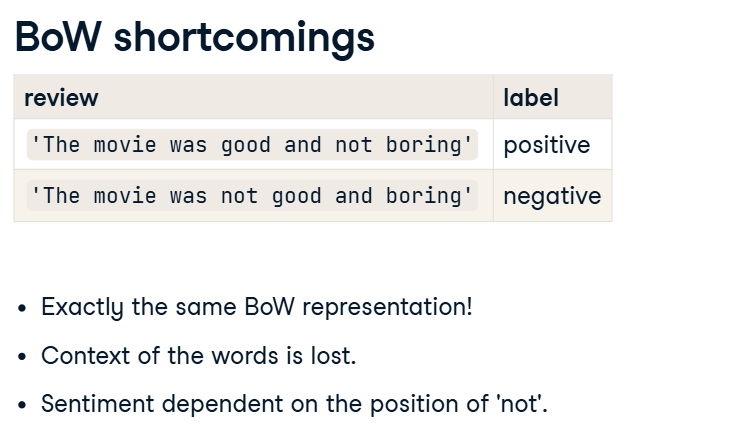

## Buidling a n-gram model

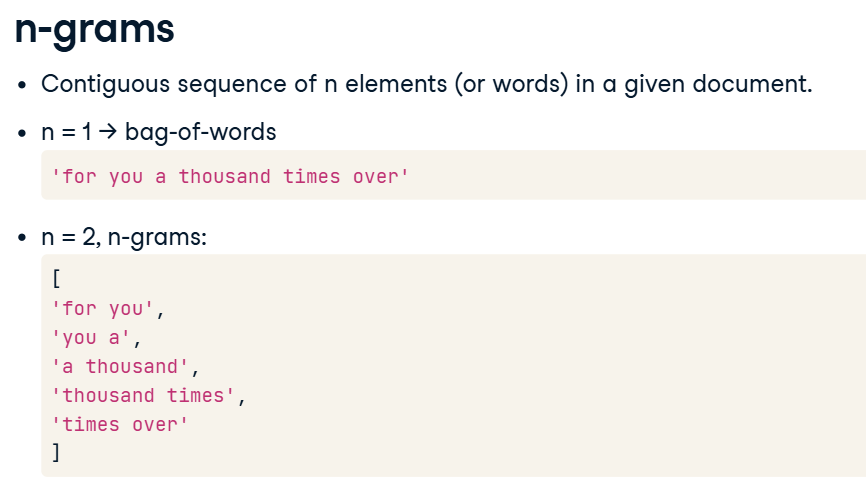

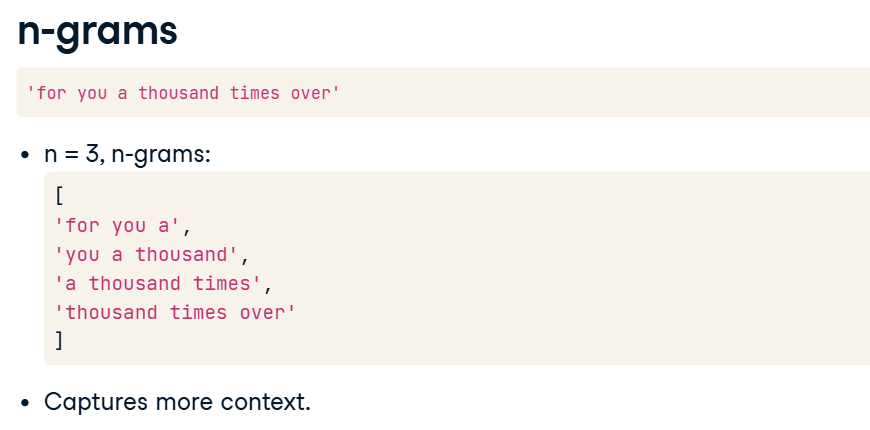

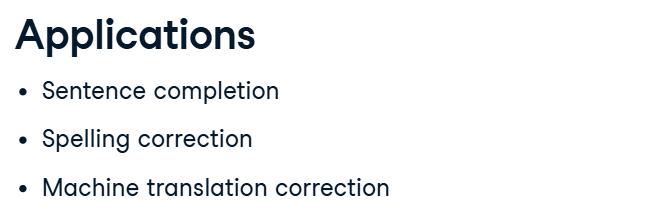

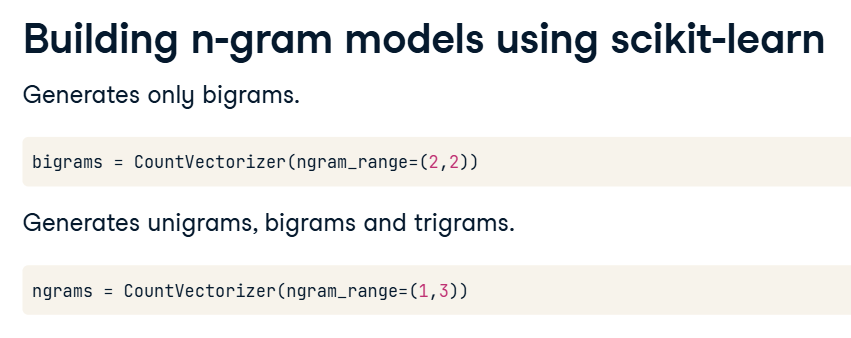

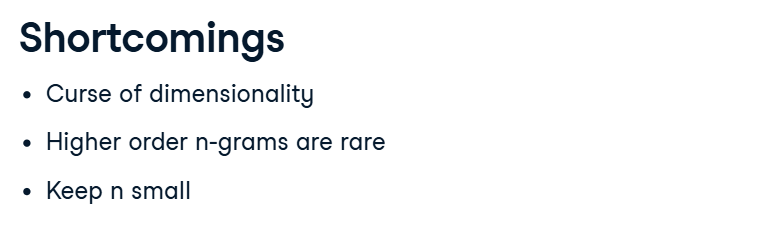

## Building tf-idf document vectors

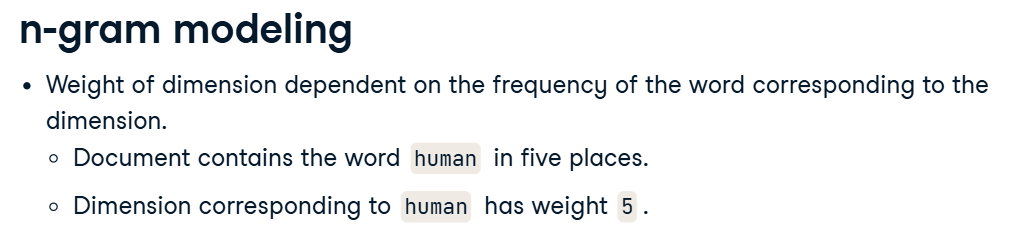

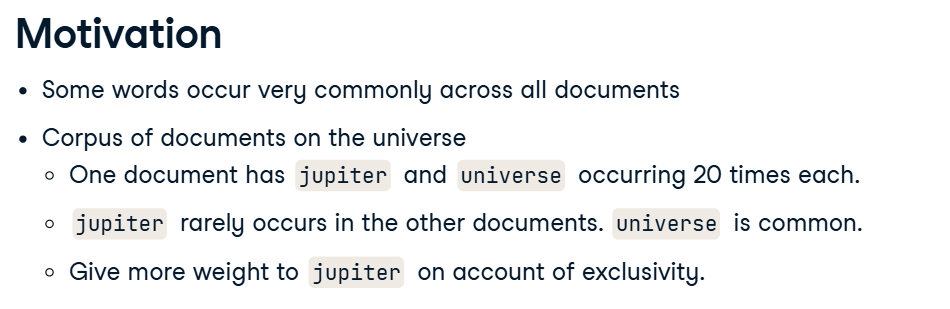

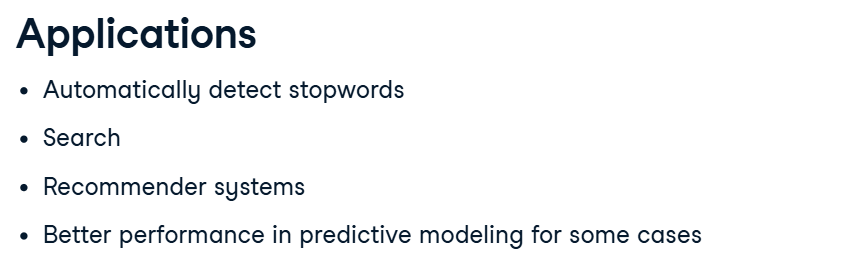

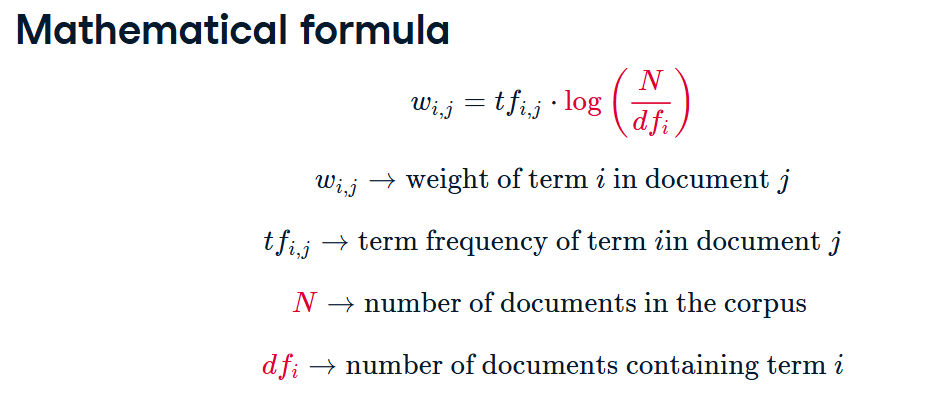

## Cosine Similarity

- how similar 2 vectors and consequently 2 documents

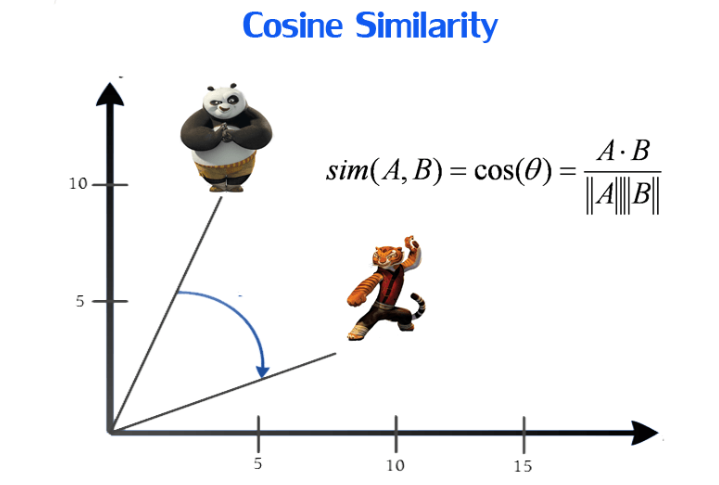

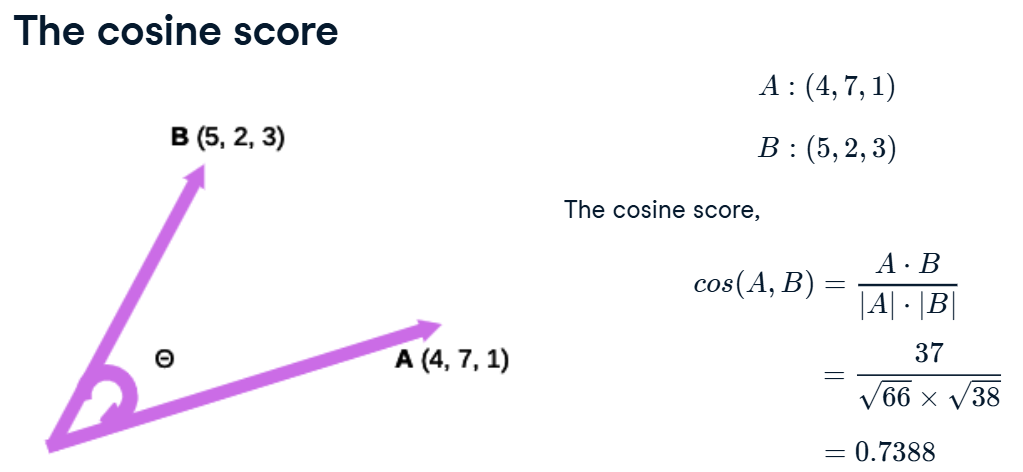

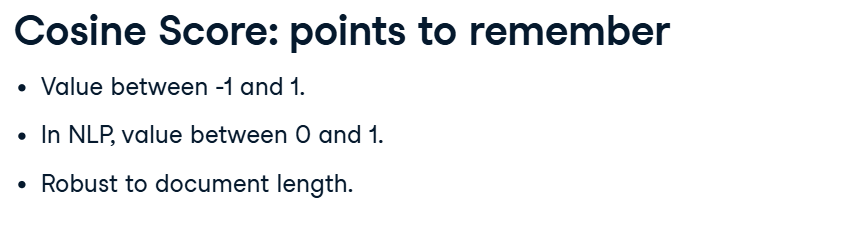

In [45]:
# import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

A = (4,7,1)
B = (5,2,3)

score = cosine_similarity([A] , [B])
print(score)

[[0.73881883]]


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = pd.Series([
    "Hello world!",
    "The bear is an animal",
    "The bear is a large animal"
])

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.         0.        ]
 [0.         1.         0.69821322]
 [0.         0.69821322 1.        ]]


In [57]:
# show

# sentence    1            2          3 
#     1      [[1.         0.         0.        ]
#     2       [0.         1.         0.69821322]
#     3       [0.         0.69821322 1.        ]]

In [67]:
np.linalg.norm([3,4])

5.0

In [68]:
# magnitude of a tfidf vector is 1
np.linalg.norm(tfidf_matrix.toarray()[0,:])

1.0

## Building a plot line based recommender

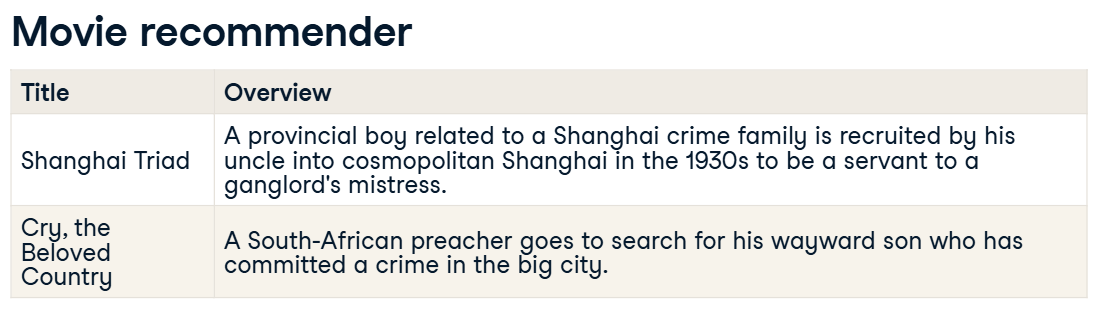

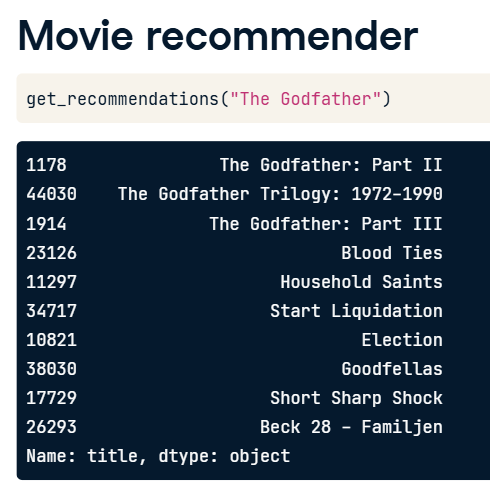

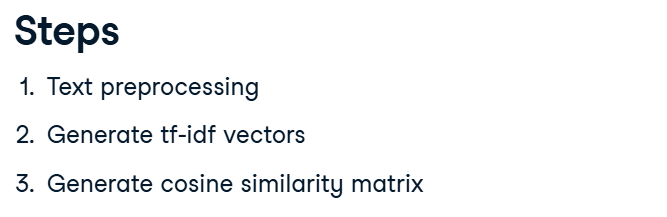

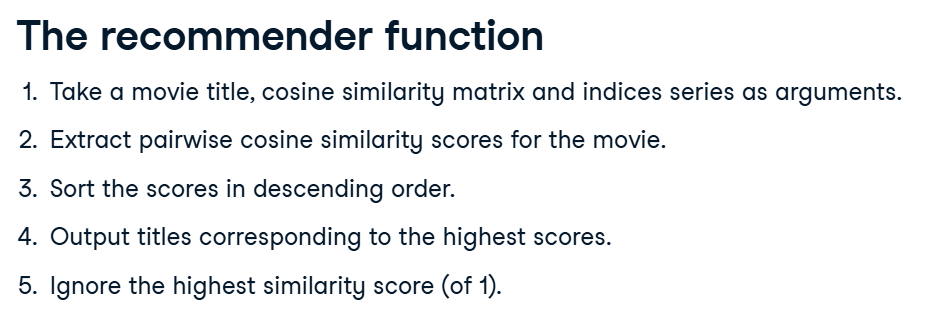

In [ ]:
# import tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# create the tfidf object
vectorizer = TfidfVectorizer()

# generate the tfidf vectors
tfidf_matrix = vectorizer.fit_transform(movie_plots)

# generate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix , tfidf_matrix)



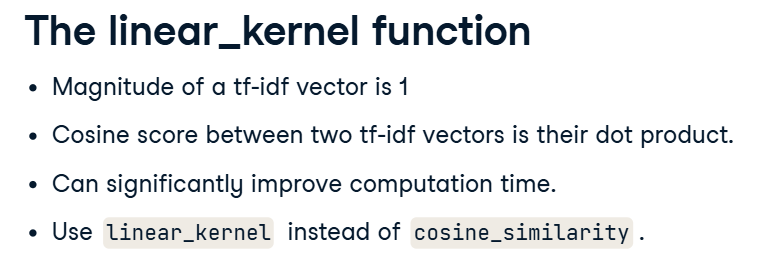

- we have 2 tfidf vectors A and B
- |A| = 1 , |B| = 1
- so A.B = cosine_similarity(A,B)

In [ ]:
# import linear kernel
from sklearn.metrics.pairwise import linear_kernel

# this is will calculate A@B.T ==> np.dot(A,B.T)
cosine_sim = linear_kernel(tfidf_matrix , tfidf_matrix)

In [ ]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [ ]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movie_plots)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('The Dark Knight Rises', cosine_sim, indices))

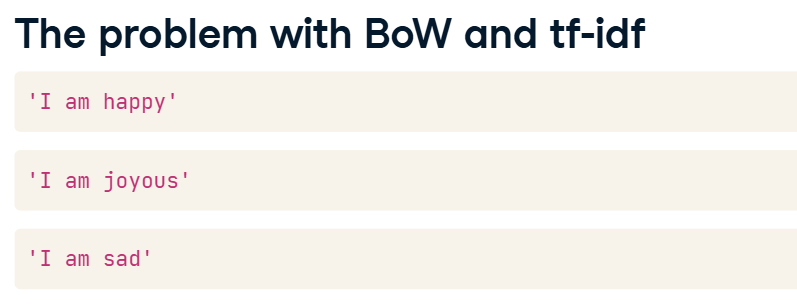

- If we calculate the cosine similarity it will give the same , for any vectorization technique
- but happy and joyous are similar , but sad is completely different
- this is something our vectorization techniques can't capture

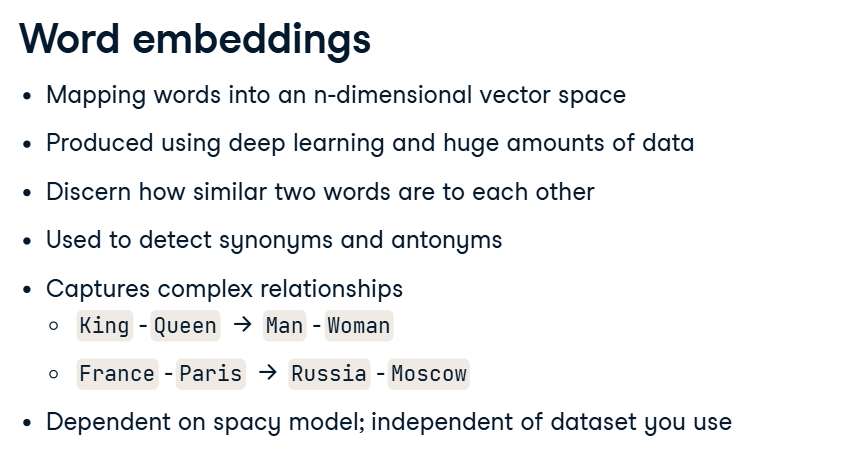

In [10]:
nlp = spacy.load('en_core_web_lg')

doc = nlp("I am happy")

In [11]:
# generate the word vector for each token
for token in doc:
    print(token.vector)

[ -1.8607     0.15804   -4.1425    -8.6359   -16.955      1.157
  -1.588      5.6609   -12.03      16.417      4.1907     5.5122
  -0.11932   -6.06       3.8957    -7.8212     3.6736   -14.824
  -7.6638     2.5344     7.9893     3.6785     4.3296   -11.338
  -3.5506    -5.899      1.0998     3.4515    -5.4191     1.8356
  -2.902     -7.9294    -1.1269     8.4124     5.1416    -3.1489
  -4.2061    -1.459      7.8313     0.27859   -4.3832     8.0756
  -0.94784   -6.1214     8.2792     5.0529    -8.3611    -6.0743
  -0.53773    2.7538     3.8162    -4.1612     0.7591    -2.8374
  -6.4851    -3.3435     3.2703     2.759      2.6645     4.0013
  13.381     -5.2907    -3.133      4.5374   -11.899     -6.716
  -0.041939  -2.0879     3.0101    10.3        2.6835     2.7265
   8.3018    -4.4563    14.43       3.9642    -4.8287    -5.648
  -7.2597   -11.475     -2.6171     0.3325    14.454     -5.155
   0.93722   -2.6187    -1.783      3.8711     1.4681    -6.705
  -4.0953    -0.22536    9.444  

## Word Similarities

In [9]:
nlp = spacy.load('en_core_web_lg')
doc = nlp("happy joyous sad")

for token1 in doc:
    for token2 in doc:
        print(token1.text , token2.text , token1.similarity(token2))

happy happy 1.0
happy joyous 0.38305550813674927
happy sad 0.5034751296043396
joyous happy 0.38305550813674927
joyous joyous 1.0
joyous sad 0.5143248438835144
sad happy 0.5034751296043396
sad joyous 0.5143248438835144
sad sad 1.0


In [5]:
sent1 = nlp("I am happy")
sent2 = nlp("I am sad")
sent3 = nlp("I am joyous")

In [6]:
sent1.similarity(sent2)

0.9740256438192407

In [10]:
sent1.similarity(sent3)

0.981972483797556